In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest_cv_2.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in haxby_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100, embedding_dim=2)

10/03/2020 12:14:07 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/03/2020 12:14:08 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/03/2020 12:14:08 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/03/2020 12:14:09 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run05_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/03/2020 12:14:10 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run06_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Fina

In [7]:
dtfa.num_voxels

32233

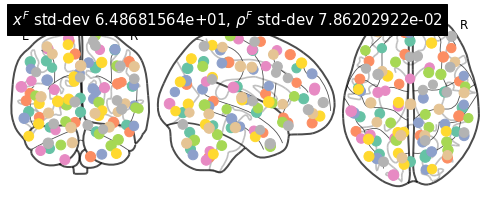

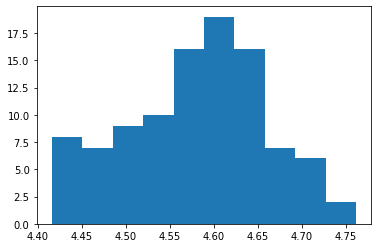

(<nilearn.plotting.displays.OrthoProjector at 0x7fb56d2c5d90>,
 tensor([[-3.1797e+01, -3.0442e+01, -2.2815e+01],
         [ 3.6504e+01, -7.7012e+00,  5.8731e+01],
         [ 4.8712e+01, -4.9411e+01, -2.0443e+01],
         [-3.5599e+01, -5.9319e+01,  4.6901e+01],
         [-2.9523e+01,  3.8344e+01,  3.9857e+01],
         [ 3.6902e-02,  4.5883e+01,  7.7934e+00],
         [ 3.8287e-01, -8.1084e+01, -6.8363e+00],
         [ 1.6127e+01, -7.6152e+01,  3.9805e+01],
         [-5.2536e+01, -3.3818e+01,  4.6044e+01],
         [ 5.5053e+01, -2.4185e+01,  2.0491e+01],
         [-5.4130e+01, -3.6835e+00, -6.4393e+00],
         [ 1.6859e+01, -7.3974e+01, -2.7613e+01],
         [-3.2265e+01, -7.3165e+01, -4.5183e+01],
         [ 3.4981e+01,  2.9106e+01, -1.7745e+01],
         [-1.1381e+01,  6.9113e-01,  6.7872e+01],
         [-5.2831e+00,  3.1809e+01,  5.4209e+01],
         [ 3.9337e+01, -7.7188e+01,  2.2896e+01],
         [ 4.3478e+01,  3.8471e+01,  2.4618e+01],
         [ 1.0867e+01, -5.3557e+01, -

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

464

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=True))

10/03/2020 12:15:14 [Epoch 1] (6375ms) Posterior free-energy 8.04243917e+09 = KL from prior 1.30245210e+07 - log-likelihood -8.02941338e+09
10/03/2020 12:15:14 Saving checkpoint...
10/03/2020 12:15:20 [Epoch 2] (6306ms) Posterior free-energy 7.83599309e+09 = KL from prior 8.10541350e+06 - log-likelihood -7.82788762e+09
10/03/2020 12:15:26 [Epoch 3] (6261ms) Posterior free-energy 7.68348467e+09 = KL from prior 5.83022400e+06 - log-likelihood -7.67765402e+09
10/03/2020 12:15:32 [Epoch 4] (5994ms) Posterior free-energy 7.58538240e+09 = KL from prior 3.88544150e+06 - log-likelihood -7.58149786e+09
10/03/2020 12:15:38 [Epoch 5] (5981ms) Posterior free-energy 7.51491891e+09 = KL from prior 2.87954875e+06 - log-likelihood -7.51203840e+09
10/03/2020 12:15:44 [Epoch 6] (6050ms) Posterior free-energy 7.45953075e+09 = KL from prior 2.00503012e+06 - log-likelihood -7.45752627e+09
10/03/2020 12:15:50 [Epoch 7] (5991ms) Posterior free-energy 7.41297050e+09 = KL from prior 1.44208162e+06 - log-likeli

Epoch   355: reducing learning rate of group 0 to 5.0000e-03.
Epoch   355: reducing learning rate of group 1 to 5.0000e-04.
Epoch   355: reducing learning rate of group 2 to 5.0000e-03.
Epoch   355: reducing learning rate of group 3 to 5.0000e-04.


10/03/2020 12:50:52 [Epoch 356] (6021ms) Posterior free-energy 5.18476390e+09 = KL from prior 1.63265450e+06 - log-likelihood -5.18313062e+09
10/03/2020 12:50:58 [Epoch 357] (6006ms) Posterior free-energy 5.15539968e+09 = KL from prior 1.63071550e+06 - log-likelihood -5.15376845e+09
10/03/2020 12:51:04 [Epoch 358] (6034ms) Posterior free-energy 5.15375821e+09 = KL from prior 1.63095612e+06 - log-likelihood -5.15212646e+09
10/03/2020 12:51:10 [Epoch 359] (6023ms) Posterior free-energy 5.15326003e+09 = KL from prior 1.62982238e+06 - log-likelihood -5.15163187e+09
10/03/2020 12:51:16 [Epoch 360] (6115ms) Posterior free-energy 5.15263539e+09 = KL from prior 1.63264012e+06 - log-likelihood -5.15100160e+09
10/03/2020 12:51:22 [Epoch 361] (6142ms) Posterior free-energy 5.15228672e+09 = KL from prior 1.63360738e+06 - log-likelihood -5.15065242e+09
10/03/2020 12:51:28 [Epoch 362] (6154ms) Posterior free-energy 5.15198874e+09 = KL from prior 1.63209075e+06 - log-likelihood -5.15035648e+09
10/03/

Epoch   588: reducing learning rate of group 0 to 2.5000e-03.
Epoch   588: reducing learning rate of group 1 to 2.5000e-04.
Epoch   588: reducing learning rate of group 2 to 2.5000e-03.
Epoch   588: reducing learning rate of group 3 to 2.5000e-04.


10/03/2020 13:14:21 [Epoch 589] (6063ms) Posterior free-energy 5.13099264e+09 = KL from prior 1.69009288e+06 - log-likelihood -5.12930304e+09
10/03/2020 13:14:27 [Epoch 590] (6060ms) Posterior free-energy 5.12391834e+09 = KL from prior 1.69005600e+06 - log-likelihood -5.12222720e+09
10/03/2020 13:14:33 [Epoch 591] (6059ms) Posterior free-energy 5.12360755e+09 = KL from prior 1.68997712e+06 - log-likelihood -5.12191795e+09
10/03/2020 13:14:39 [Epoch 592] (6023ms) Posterior free-energy 5.12341914e+09 = KL from prior 1.69073950e+06 - log-likelihood -5.12172902e+09
10/03/2020 13:14:45 [Epoch 593] (6057ms) Posterior free-energy 5.12327475e+09 = KL from prior 1.69175188e+06 - log-likelihood -5.12158208e+09
10/03/2020 13:14:51 [Epoch 594] (6034ms) Posterior free-energy 5.12317133e+09 = KL from prior 1.69280912e+06 - log-likelihood -5.12147763e+09
10/03/2020 13:14:57 [Epoch 595] (6084ms) Posterior free-energy 5.12314880e+09 = KL from prior 1.68863788e+06 - log-likelihood -5.12146022e+09
10/03/

Epoch   915: reducing learning rate of group 0 to 1.2500e-03.
Epoch   915: reducing learning rate of group 1 to 1.2500e-04.
Epoch   915: reducing learning rate of group 2 to 1.2500e-03.
Epoch   915: reducing learning rate of group 3 to 1.2500e-04.


10/03/2020 13:47:22 [Epoch 916] (6031ms) Posterior free-energy 5.11161702e+09 = KL from prior 1.73934475e+06 - log-likelihood -5.10987776e+09
10/03/2020 13:47:28 [Epoch 917] (6058ms) Posterior free-energy 5.11142656e+09 = KL from prior 1.73468462e+06 - log-likelihood -5.10969190e+09
10/03/2020 13:47:34 [Epoch 918] (6067ms) Posterior free-energy 5.11145114e+09 = KL from prior 1.73047788e+06 - log-likelihood -5.10971955e+09
10/03/2020 13:47:40 [Epoch 919] (6089ms) Posterior free-energy 5.11120998e+09 = KL from prior 1.73489312e+06 - log-likelihood -5.10947379e+09
10/03/2020 13:47:46 [Epoch 920] (6049ms) Posterior free-energy 5.11109171e+09 = KL from prior 1.73642775e+06 - log-likelihood -5.10935552e+09
10/03/2020 13:47:52 [Epoch 921] (6051ms) Posterior free-energy 5.11110195e+09 = KL from prior 1.73430175e+06 - log-likelihood -5.10936781e+09
10/03/2020 13:47:59 [Epoch 922] (6067ms) Posterior free-energy 5.11102618e+09 = KL from prior 1.73191175e+06 - log-likelihood -5.10929459e+09
10/03/

Epoch   941: reducing learning rate of group 0 to 6.2500e-04.
Epoch   941: reducing learning rate of group 1 to 6.2500e-05.
Epoch   941: reducing learning rate of group 2 to 6.2500e-04.
Epoch   941: reducing learning rate of group 3 to 6.2500e-05.


10/03/2020 13:50:00 [Epoch 942] (6038ms) Posterior free-energy 5.11066675e+09 = KL from prior 1.73318600e+06 - log-likelihood -5.10893414e+09
10/03/2020 13:50:06 [Epoch 943] (6064ms) Posterior free-energy 5.11058330e+09 = KL from prior 1.73081550e+06 - log-likelihood -5.10885222e+09
10/03/2020 13:50:12 [Epoch 944] (6064ms) Posterior free-energy 5.11053312e+09 = KL from prior 1.73205325e+06 - log-likelihood -5.10880205e+09
10/03/2020 13:50:18 [Epoch 945] (6099ms) Posterior free-energy 5.11056128e+09 = KL from prior 1.73483038e+06 - log-likelihood -5.10882662e+09
10/03/2020 13:50:24 [Epoch 946] (6099ms) Posterior free-energy 5.11047834e+09 = KL from prior 1.73325888e+06 - log-likelihood -5.10874522e+09
10/03/2020 13:50:30 [Epoch 947] (6111ms) Posterior free-energy 5.11052032e+09 = KL from prior 1.73428462e+06 - log-likelihood -5.10878669e+09
10/03/2020 13:50:36 [Epoch 948] (6156ms) Posterior free-energy 5.11036416e+09 = KL from prior 1.73427575e+06 - log-likelihood -5.10862950e+09
10/03/

Epoch   965: reducing learning rate of group 0 to 3.1250e-04.
Epoch   965: reducing learning rate of group 1 to 3.1250e-05.
Epoch   965: reducing learning rate of group 2 to 3.1250e-04.
Epoch   965: reducing learning rate of group 3 to 3.1250e-05.


10/03/2020 13:52:24 [Epoch 966] (5976ms) Posterior free-energy 5.11029606e+09 = KL from prior 1.73275675e+06 - log-likelihood -5.10856346e+09
10/03/2020 13:52:30 [Epoch 967] (5952ms) Posterior free-energy 5.11016141e+09 = KL from prior 1.73353575e+06 - log-likelihood -5.10842726e+09
10/03/2020 13:52:36 [Epoch 968] (5955ms) Posterior free-energy 5.11025715e+09 = KL from prior 1.73206000e+06 - log-likelihood -5.10852454e+09
10/03/2020 13:52:42 [Epoch 969] (5965ms) Posterior free-energy 5.11004365e+09 = KL from prior 1.73398775e+06 - log-likelihood -5.10830950e+09
10/03/2020 13:52:48 [Epoch 970] (5962ms) Posterior free-energy 5.11020134e+09 = KL from prior 1.73284225e+06 - log-likelihood -5.10846874e+09
10/03/2020 13:52:54 [Epoch 971] (5991ms) Posterior free-energy 5.11020032e+09 = KL from prior 1.73304962e+06 - log-likelihood -5.10846925e+09
10/03/2020 13:53:00 [Epoch 972] (6025ms) Posterior free-energy 5.11011430e+09 = KL from prior 1.73278788e+06 - log-likelihood -5.10838272e+09
10/03/

Epoch   995: reducing learning rate of group 0 to 1.5625e-04.
Epoch   995: reducing learning rate of group 1 to 1.5625e-05.
Epoch   995: reducing learning rate of group 2 to 1.5625e-04.
Epoch   995: reducing learning rate of group 3 to 1.5625e-05.


10/03/2020 13:55:24 [Epoch 996] (5978ms) Posterior free-energy 5.10998477e+09 = KL from prior 1.73014338e+06 - log-likelihood -5.10825626e+09
10/03/2020 13:55:30 [Epoch 997] (5991ms) Posterior free-energy 5.11003648e+09 = KL from prior 1.73169438e+06 - log-likelihood -5.10830541e+09
10/03/2020 13:55:36 [Epoch 998] (5985ms) Posterior free-energy 5.11008154e+09 = KL from prior 1.73360062e+06 - log-likelihood -5.10834739e+09
10/03/2020 13:55:42 [Epoch 999] (5987ms) Posterior free-energy 5.10990694e+09 = KL from prior 1.73619512e+06 - log-likelihood -5.10817126e+09
10/03/2020 13:55:48 [Epoch 1000] (6020ms) Posterior free-energy 5.10993613e+09 = KL from prior 1.73351175e+06 - log-likelihood -5.10820301e+09
10/03/2020 13:55:48 Saving checkpoint...


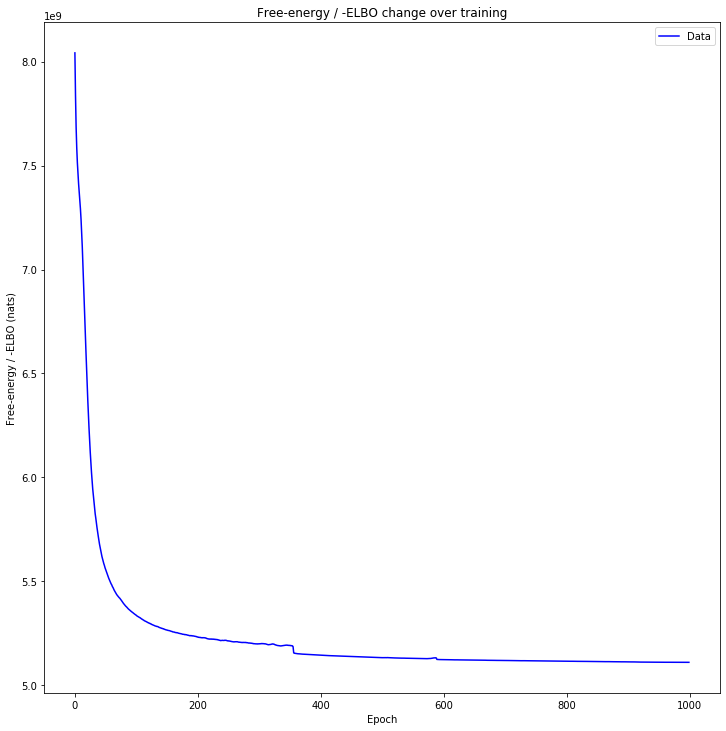

In [11]:
utils.plot_losses(losses)

In [12]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=False))

10/03/2020 13:55:49 [Epoch 1] (686ms) Posterior free-energy 1.25953152e+09 = KL from prior 9.68466562e+04 - log-likelihood -1.25943450e+09
10/03/2020 13:55:49 Saving checkpoint...
10/03/2020 13:55:50 [Epoch 2] (694ms) Posterior free-energy 1.24117760e+09 = KL from prior 9.33099219e+04 - log-likelihood -1.24108429e+09
10/03/2020 13:55:51 [Epoch 3] (693ms) Posterior free-energy 1.20833715e+09 = KL from prior 9.24233203e+04 - log-likelihood -1.20824461e+09
10/03/2020 13:55:52 [Epoch 4] (690ms) Posterior free-energy 1.18397184e+09 = KL from prior 8.95969297e+04 - log-likelihood -1.18388224e+09
10/03/2020 13:55:52 [Epoch 5] (690ms) Posterior free-energy 1.15567296e+09 = KL from prior 8.78722422e+04 - log-likelihood -1.15558515e+09
10/03/2020 13:55:53 [Epoch 6] (690ms) Posterior free-energy 1.14379597e+09 = KL from prior 8.81923203e+04 - log-likelihood -1.14370778e+09
10/03/2020 13:55:54 [Epoch 7] (686ms) Posterior free-energy 1.11117939e+09 = KL from prior 8.67445234e+04 - log-likelihood -1

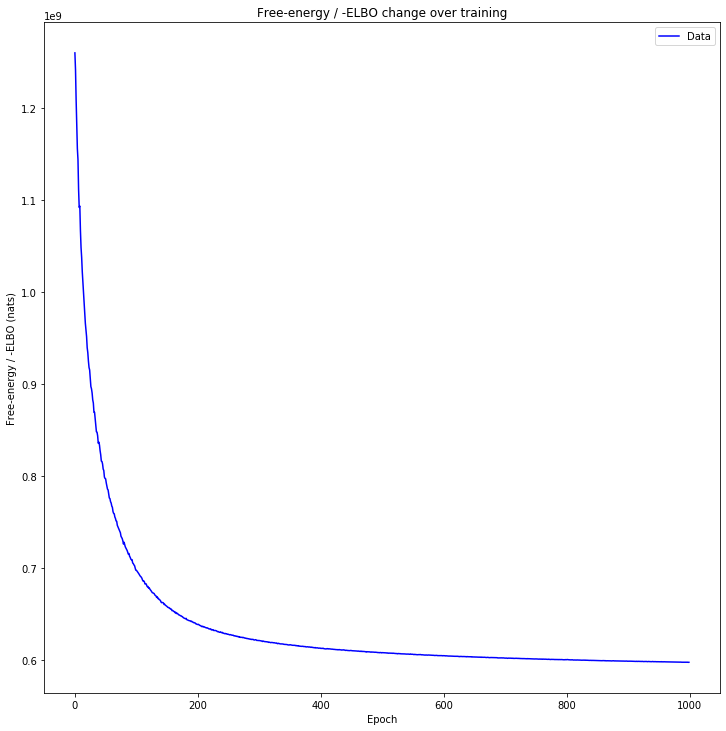

In [13]:
utils.plot_losses(losses)

In [14]:
def task_labeler(task):
    return task

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

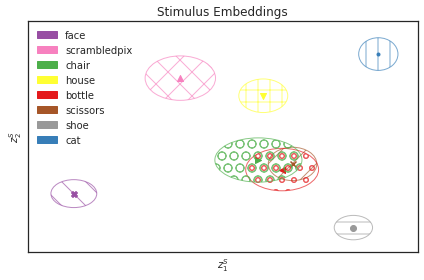

In [15]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='haxby_norest_task_embedding.pdf')

In [16]:
def subject_labeler(subject):
    return 'Subject %d' % subject

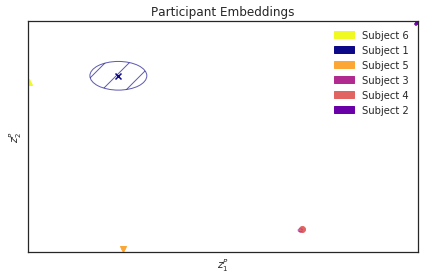

In [17]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [18]:
def block_task_labeler(b):
    task = b.task
    return task

10/03/2020 14:07:24 Plotting factors for Participant 1, run 7


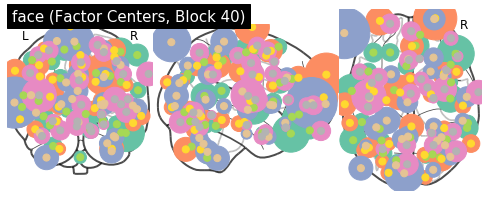

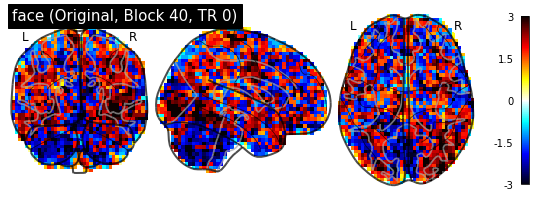

10/03/2020 14:07:26 Reconstruction Error (Frobenius Norm): 1.34880783e+02 out of 6.47795227e+02


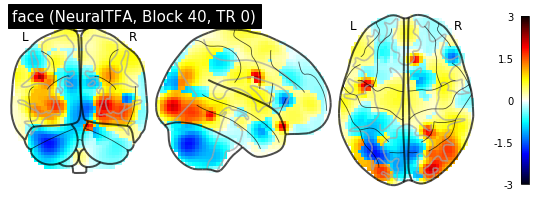

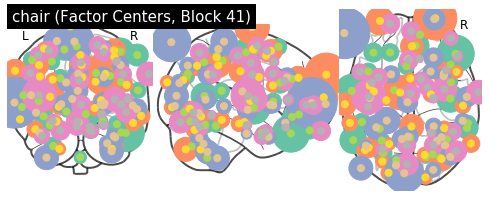

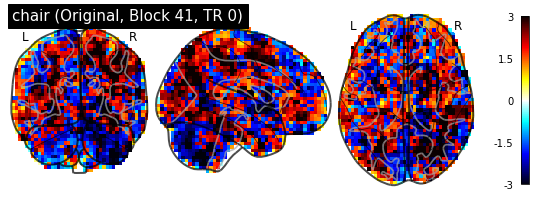

10/03/2020 14:07:29 Reconstruction Error (Frobenius Norm): 1.17463982e+02 out of 6.43679199e+02


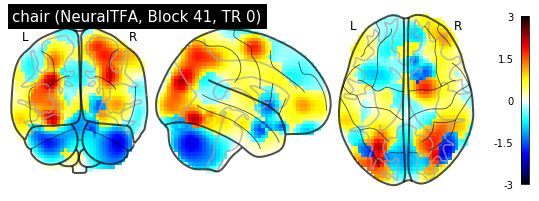

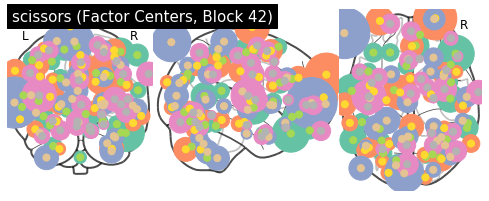

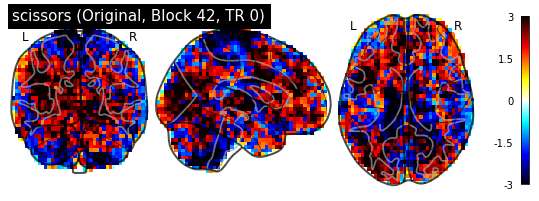

10/03/2020 14:07:32 Reconstruction Error (Frobenius Norm): 1.35195709e+02 out of 5.97688843e+02


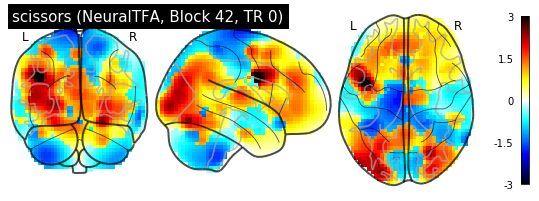

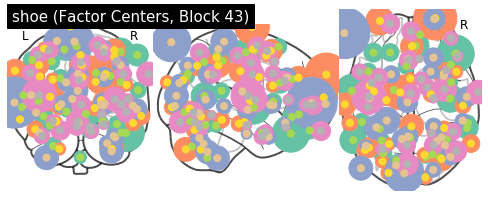

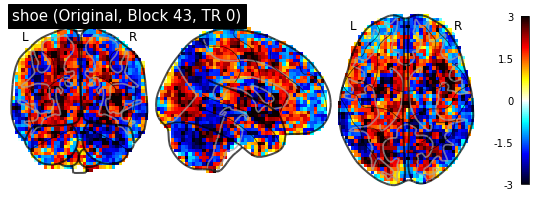

10/03/2020 14:07:35 Reconstruction Error (Frobenius Norm): 1.34482590e+02 out of 5.66922241e+02


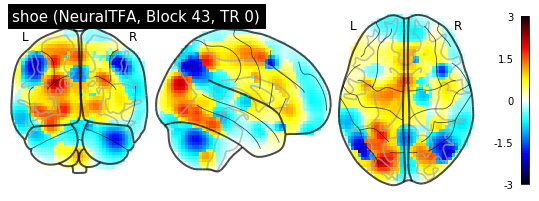

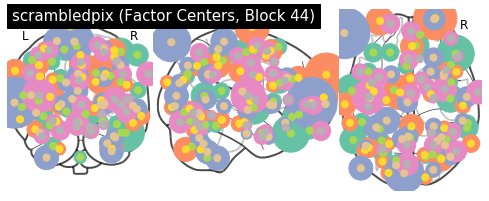

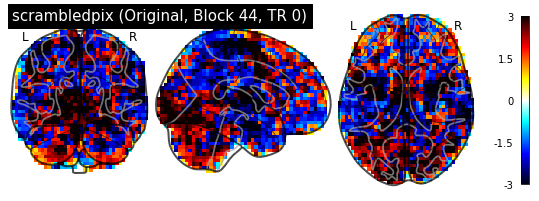

10/03/2020 14:07:37 Reconstruction Error (Frobenius Norm): 1.30751480e+02 out of 6.38755554e+02


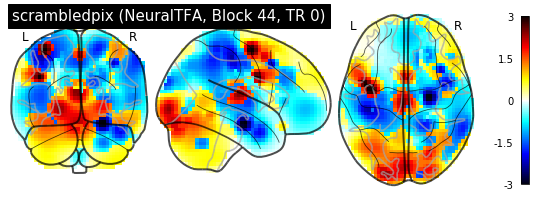

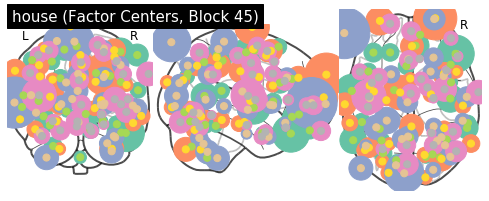

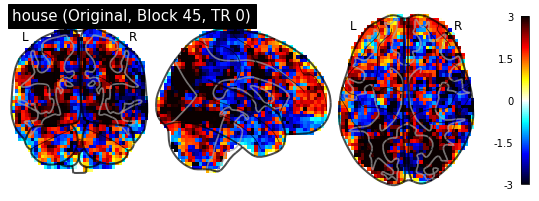

10/03/2020 14:07:40 Reconstruction Error (Frobenius Norm): 1.38611938e+02 out of 6.90482117e+02


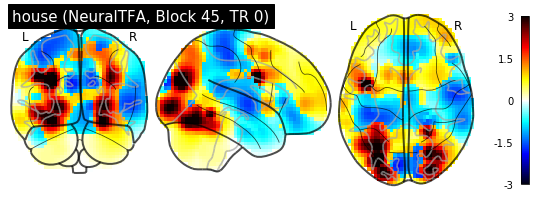

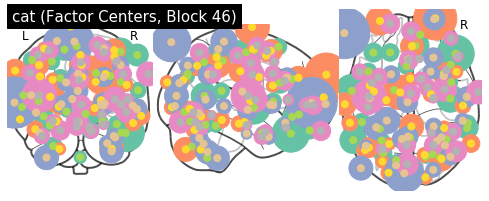

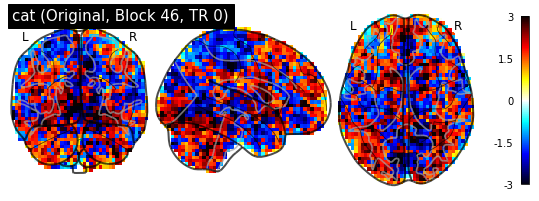

10/03/2020 14:07:43 Reconstruction Error (Frobenius Norm): 1.30374252e+02 out of 6.38014587e+02


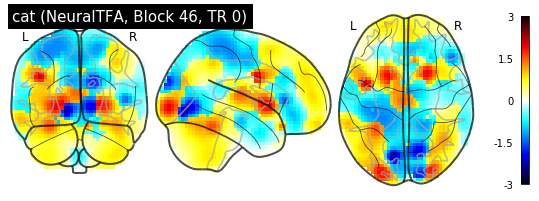

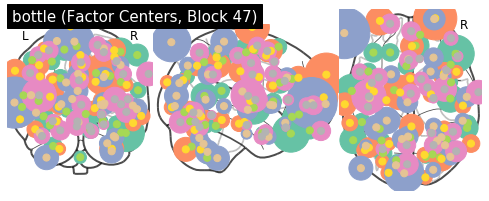

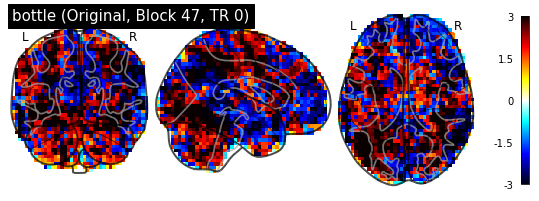

10/03/2020 14:07:46 Reconstruction Error (Frobenius Norm): 1.34344894e+02 out of 6.67595276e+02


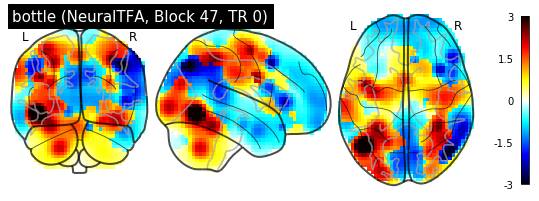

In [19]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

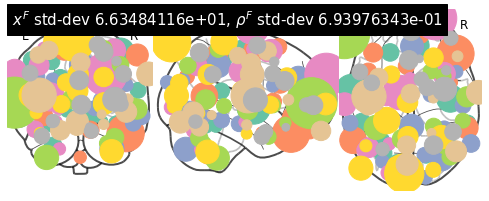

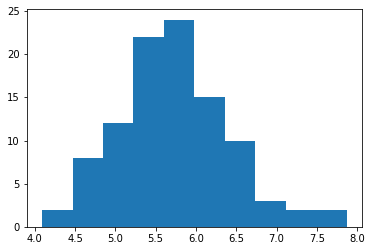

(<nilearn.plotting.displays.OrthoProjector at 0x7fb52c737a90>,
 tensor([[-3.1778e+01, -4.6495e+01, -2.0730e+01],
         [ 4.2421e+01, -1.4610e+01,  5.6609e+01],
         [ 3.8561e+01, -5.7707e+01, -1.9669e+01],
         [-2.9848e+01, -5.8819e+01,  4.6244e+01],
         [-2.0858e+01,  3.3884e+01,  2.8702e+01],
         [ 5.9168e+00,  4.0999e+01, -8.8398e+00],
         [-1.4488e+01, -7.9485e+01, -6.2291e+00],
         [ 1.6716e+01, -7.5850e+01,  3.4206e+01],
         [-5.0542e+01, -3.9258e+01,  4.7846e+01],
         [ 6.0899e+01, -4.0464e+01,  1.6016e+01],
         [-6.1228e+01, -6.6002e+00, -1.5357e+00],
         [ 2.3667e+01, -7.3431e+01, -1.6131e+01],
         [-2.8359e+01, -7.2082e+01, -4.2611e+01],
         [ 4.7825e+01,  3.2559e+01, -2.9028e+01],
         [-1.6631e+01, -5.7661e+00,  5.8882e+01],
         [-3.7311e+00,  1.9559e+01,  6.2475e+01],
         [ 3.1534e+01, -7.6827e+01,  3.1187e+01],
         [ 4.2742e+01,  2.0918e+01,  2.4698e+01],
         [ 6.2501e-02, -5.5410e+01, -

In [20]:
dtfa.visualize_factor_embedding()

In [21]:
dtfa.average_reconstruction_error(weighted=False,
                                  blocks_filter=haxby_db.inference_filter(training=True))

10/03/2020 14:07:56 Average reconstruction error (MSE): 5.20671954e+02 +/- 4.24878456e+01
10/03/2020 14:07:56 Average data norm (Euclidean): 5.99809257e+02 +/- 6.14664351e+01
10/03/2020 14:07:56 Percent average reconstruction error: 87.060203 +/- 3.94752560e+00


(array([558.44244385, 532.43273926, 497.50320435, 504.72463989,
        524.74121094, 507.72415161, 509.97747803, 485.85174561,
        499.30804443, 494.62796021, 468.19259644, 498.86373901,
        477.66333008, 532.51879883, 499.8182373 , 509.07614136,
        610.48144531, 545.28625488, 505.42889404, 530.9473877 ,
        475.97314453, 510.20962524, 512.46307373, 474.94241333,
        583.76281738, 521.80413818, 464.93530273, 492.01834106,
        529.49414062, 489.14370728, 504.45043945, 538.24456787,
        592.38873291, 498.63534546, 495.36077881, 517.75085449,
        524.77581787, 506.73480225, 541.97595215, 489.57315063,
        520.53686523, 533.05273438, 482.87127686, 454.3789978 ,
        504.81558228, 549.33294678, 516.05853271, 546.79644775,
        453.37384033, 448.86087036, 466.09429932, 448.13433838,
        464.53982544, 464.55725098, 428.95608521, 492.79193115,
        503.71923828, 459.04394531, 409.92355347, 436.80892944,
        458.0010376 , 454.02322388, 462.

In [22]:
dtfa.free_energy(batch_size=50, use_cuda=True, blocks_batch_size=10, num_particles=1, sample_size=100,
                 blocks_filter=haxby_db.inference_filter(training=False))

[[597962240.0, -597815488.0, 146714.21875],
 [598129536.0, -597670528.0, 147160.25]]